## YOLOv11

The first model we will train is YOLOv11, the state-of-the-art single-stage object detection model. The reason for starting with a YOLO model is that it is relatively simple to train and has a good balance between speed and accuracy. A previous version of the model, YOLOv7 was used successfully for the exact same purpose (i.e. detecting brain tumors) [here](https://pmc.ncbi.nlm.nih.gov/articles/PMC10453020/#sec3-cancers-15-04172). So it is reasonable to expect that YOLOv11 will perform well on this task.

### Load the weights

First let's load the weights from ultralytics' YOLOv11 model.

In [2]:
from ultralytics import YOLO

# Load a pretrained YOLO model (medium, detection only)
model = YOLO("yolo11m.pt")

### Test the pre-trained model

Make sure we can at least make one prediction with the pre-trained model, before we start training it on our data.

In [9]:
# Test on a sample image to make sure the weights are loaded correctly
result = model(source="./data_source/SampleDataset/street-sample1.png")
result[0].show()


image 1/1 /Users/antoinejanssen/Projects/UniversityOfLondon/FinalProject/data_source/SampleDataset/street-sample1.png: 448x640 13 persons, 3 cars, 1 truck, 6 traffic lights, 1 backpack, 2 handbags, 77.7ms
Speed: 2.7ms preprocess, 77.7ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)


(in case you don't want it to open a window with the image)
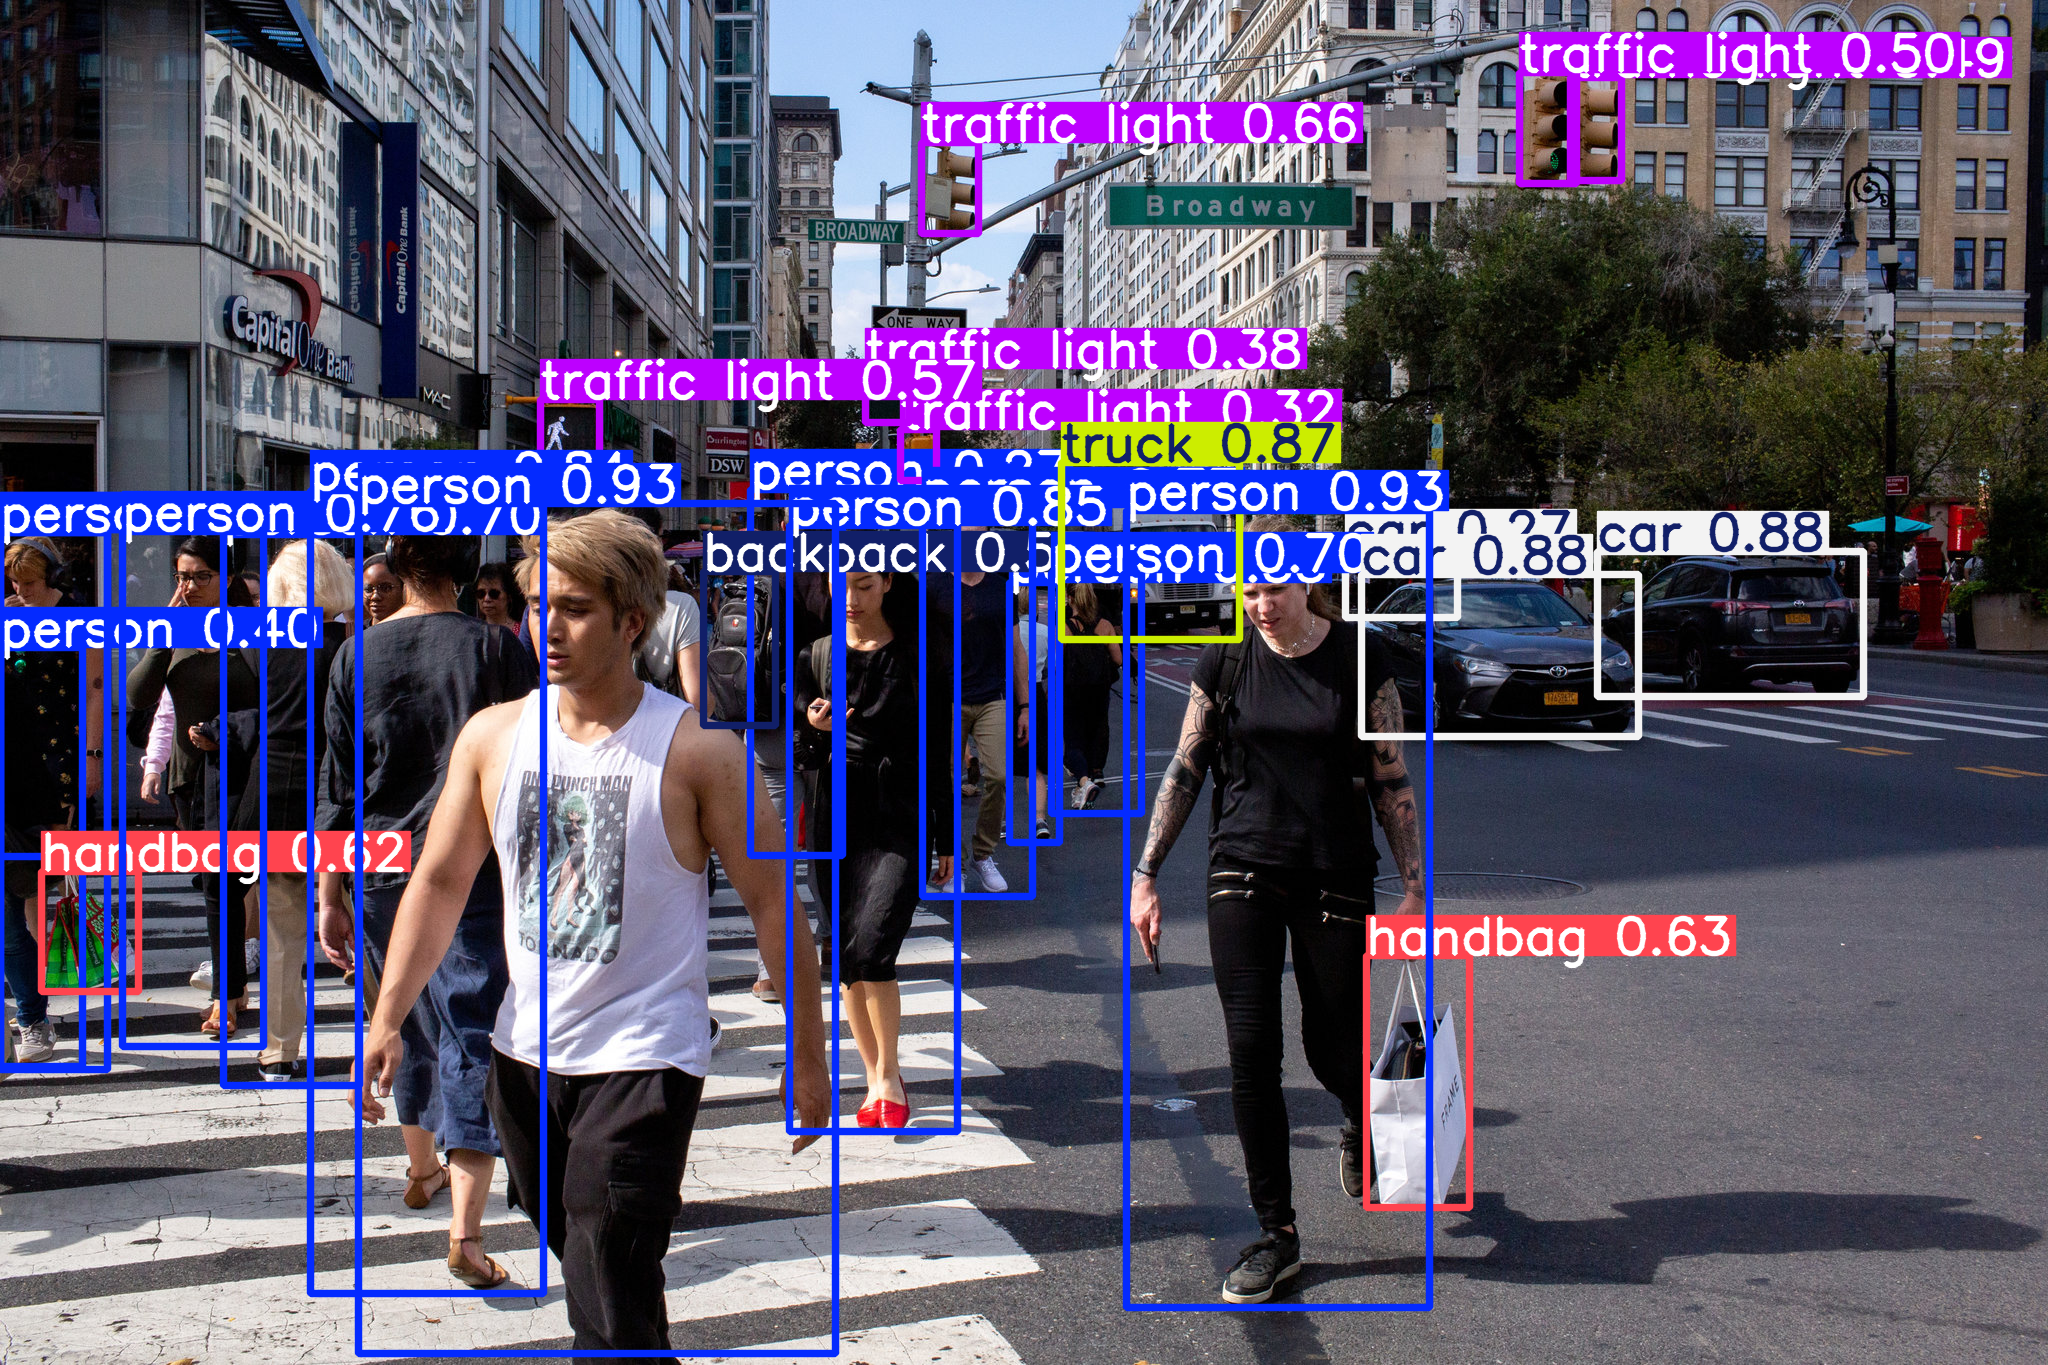

Now also test it on an image from our raw dataset. This should not detect anything, as the model has been trained on the COCO dataset, which does not contain brain tumor images.

In [8]:
# Now try and detect a brain tumor in an MRI image without any fine-tuning
tumor_result = model("./datasets/raw/raw/meningioma/Tr-me_0547.jpg")
tumor_result[0].show()


image 1/1 /Users/antoinejanssen/Projects/UniversityOfLondon/FinalProject/datasets/raw/raw/meningioma/Tr-me_0547.jpg: 640x640 (no detections), 117.2ms
Speed: 2.8ms preprocess, 117.2ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)


(in case you don't want it to open a window with the image)
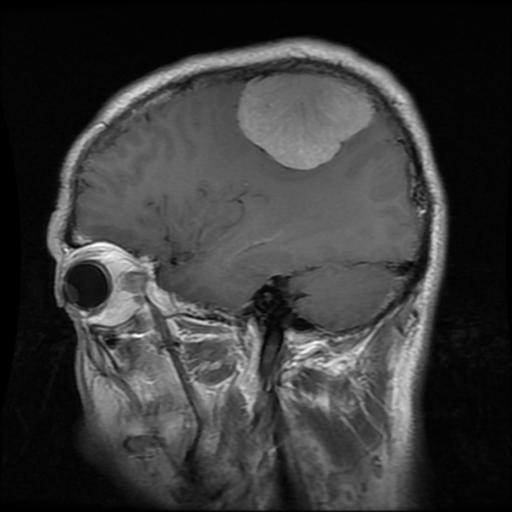

### Fine-tuning the model

For the next step we will fine-tune the model on our raw labeled MRI images. We don't need to train any internal layers, simply adjust the last layer to output our tumor classes (i.e. glioma, meningioma, pituitary tumor, no tumor)

### Define a dataset

In [ ]:
results = model.train(
    data="processed_split/dataset.yaml",
    epochs=100,
    imgsz=512,
    batch=8,
    device="cuda",
    save_period=5
)

New https://pypi.org/project/ultralytics/8.3.70 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.39 🚀 Python-3.11.7 torch-2.5.1 MPS (Apple M3 Max)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=./datasets/yolo/dataset.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=mps, workers=8, project=None, name=train19, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_tx

train: Scanning /Users/antoinejanssen/Projects/UniversityOfLondon/FinalProject/datasets/yolo/training/labels... 1740 images, 2 backgrounds, 0 corrupt: 100%|██████████| 1740/1740 [00:00<00:00, 5337.52it/s]

train: New cache created: /Users/antoinejanssen/Projects/UniversityOfLondon/FinalProject/datasets/yolo/training/labels.cache



val: Scanning /Users/antoinejanssen/Projects/UniversityOfLondon/FinalProject/datasets/yolo/testing/labels... 435 images, 0 backgrounds, 0 corrupt: 100%|██████████| 435/435 [00:00<00:00, 5051.45it/s]

val: New cache created: /Users/antoinejanssen/Projects/UniversityOfLondon/FinalProject/datasets/yolo/testing/labels.cache


Plotting labels to runs/detect/train19/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 512 train, 512 val
Using 0 dataloader workers
Logging results to runs/detect/train19
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      11.7G      2.068      2.984      2.055         30        512: 100%|██████████| 109/109 [02:43<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/14 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   7%|▋         | 1/14 [00:17<03:49, 17.63s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 2/14 [00:24<02:16, 11.39s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  21%|██▏       | 3/14 [00:30<01:35,  8.64s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▊       | 4/14 [00:35<01:13,  7.30s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  36%|███▌      | 5/14 [00:40<00:58,  6.49s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|████▎     | 6/14 [00:45<00:48,  6.06s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 7/14 [00:50<00:39,  5.69s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|█████▋    | 8/14 [00:57<00:37,  6.26s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  64%|██████▍   | 9/14 [01:03<00:29,  5.91s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  71%|███████▏  | 10/14 [01:10<00:25,  6.30s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  79%|███████▊  | 11/14 [01:15<00:18,  6.11s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86%|████████▌ | 12/14 [01:22<00:12,  6.14s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  93%|█████████▎| 13/14 [01:36<00:08,  8.53s/it]

WARNING ⚠️ NMS time limit 2.950s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:49<00:00,  7.85s/it]


                   all        435        439      0.605      0.174       0.19      0.104

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      11.8G       1.62      1.635       1.55         25        512: 100%|██████████| 109/109 [04:27<00:00,  2.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/14 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   7%|▋         | 1/14 [00:08<01:50,  8.51s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 2/14 [00:19<01:58,  9.89s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  21%|██▏       | 3/14 [00:28<01:47,  9.73s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▊       | 4/14 [00:38<01:34,  9.48s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  36%|███▌      | 5/14 [00:48<01:27,  9.75s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|████▎     | 6/14 [00:56<01:14,  9.26s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 7/14 [01:04<01:02,  8.99s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|█████▋    | 8/14 [01:12<00:51,  8.58s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  64%|██████▍   | 9/14 [01:19<00:40,  8.15s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  71%|███████▏  | 10/14 [01:27<00:32,  8.14s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  79%|███████▊  | 11/14 [01:35<00:23,  7.83s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86%|████████▌ | 12/14 [01:42<00:15,  7.55s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  93%|█████████▎| 13/14 [01:51<00:08,  8.24s/it]

WARNING ⚠️ NMS time limit 2.950s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [02:00<00:00,  8.57s/it]


                   all        435        439      0.747        0.1      0.103     0.0644

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      11.8G      1.535      1.325      1.454         24        512: 100%|██████████| 109/109 [04:53<00:00,  2.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/14 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   7%|▋         | 1/14 [00:10<02:15, 10.40s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 2/14 [00:18<01:51,  9.28s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  21%|██▏       | 3/14 [00:29<01:49,  9.92s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▊       | 4/14 [00:39<01:38,  9.87s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  36%|███▌      | 5/14 [00:49<01:29,  9.96s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|████▎     | 6/14 [00:59<01:18,  9.83s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 7/14 [01:07<01:06,  9.51s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|█████▋    | 8/14 [01:18<00:58,  9.71s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  64%|██████▍   | 9/14 [01:25<00:44,  8.90s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  71%|███████▏  | 10/14 [01:33<00:35,  8.86s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  79%|███████▊  | 11/14 [01:41<00:25,  8.41s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86%|████████▌ | 12/14 [01:49<00:16,  8.23s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  93%|█████████▎| 13/14 [01:58<00:08,  8.64s/it]

WARNING ⚠️ NMS time limit 2.950s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [02:07<00:00,  9.14s/it]


                   all        435        439      0.506      0.101      0.105     0.0636

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      11.8G      1.481      1.136      1.413         27        512: 100%|██████████| 109/109 [06:48<00:00,  3.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/14 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   7%|▋         | 1/14 [00:10<02:17, 10.54s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 2/14 [00:21<02:10, 10.91s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  21%|██▏       | 3/14 [00:31<01:53, 10.35s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▊       | 4/14 [00:40<01:40, 10.03s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  36%|███▌      | 5/14 [00:49<01:26,  9.60s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|████▎     | 6/14 [00:56<01:09,  8.71s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 7/14 [01:01<00:52,  7.53s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|█████▋    | 8/14 [01:10<00:47,  7.86s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  64%|██████▍   | 9/14 [01:22<00:45,  9.20s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  71%|███████▏  | 10/14 [01:32<00:37,  9.31s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  79%|███████▊  | 11/14 [01:40<00:26,  8.91s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86%|████████▌ | 12/14 [01:46<00:16,  8.23s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  93%|█████████▎| 13/14 [01:53<00:07,  7.73s/it]

WARNING ⚠️ NMS time limit 2.950s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [02:00<00:00,  8.60s/it]


                   all        435        439      0.506     0.0857      0.113      0.072

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      11.9G      1.439       1.06      1.394         29        512: 100%|██████████| 109/109 [07:22<00:00,  4.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/14 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   7%|▋         | 1/14 [00:09<02:08,  9.88s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 2/14 [00:20<02:05, 10.43s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  21%|██▏       | 3/14 [00:25<01:27,  7.92s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▊       | 4/14 [00:30<01:08,  6.84s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  36%|███▌      | 5/14 [00:39<01:07,  7.52s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|████▎     | 6/14 [00:46<00:58,  7.34s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 7/14 [00:53<00:49,  7.13s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|█████▋    | 8/14 [00:58<00:38,  6.44s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  64%|██████▍   | 9/14 [01:06<00:35,  7.16s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  71%|███████▏  | 10/14 [01:13<00:28,  7.10s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  79%|███████▊  | 11/14 [01:24<00:24,  8.08s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86%|████████▌ | 12/14 [01:30<00:15,  7.62s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  93%|█████████▎| 13/14 [01:42<00:08,  8.80s/it]

WARNING ⚠️ NMS time limit 2.950s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:49<00:00,  7.79s/it]


                   all        435        439      0.742      0.128      0.164      0.107

5 epochs completed in 0.607 hours.
Optimizer stripped from runs/detect/train19/weights/last.pt, 40.5MB
Optimizer stripped from runs/detect/train19/weights/best.pt, 40.5MB

Validating runs/detect/train19/weights/best.pt...
Ultralytics 8.3.39 🚀 Python-3.11.7 torch-2.5.1 MPS (Apple M3 Max)
YOLO11m summary (fused): 303 layers, 20,033,116 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/14 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   7%|▋         | 1/14 [00:14<03:12, 14.81s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 2/14 [00:19<01:49,  9.15s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  21%|██▏       | 3/14 [00:24<01:17,  7.07s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▊       | 4/14 [00:29<01:01,  6.16s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  36%|███▌      | 5/14 [00:34<00:53,  5.90s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|████▎     | 6/14 [00:39<00:43,  5.46s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 7/14 [00:43<00:36,  5.16s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|█████▋    | 8/14 [00:48<00:30,  5.04s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  64%|██████▍   | 9/14 [00:54<00:26,  5.38s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  71%|███████▏  | 10/14 [00:59<00:20,  5.20s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  79%|███████▊  | 11/14 [01:04<00:15,  5.08s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86%|████████▌ | 12/14 [01:11<00:11,  5.61s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  93%|█████████▎| 13/14 [01:23<00:07,  7.64s/it]

WARNING ⚠️ NMS time limit 2.950s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:36<00:00,  6.86s/it]


                   all        435        439      0.518     0.0459     0.0465     0.0259
             pituitary        124        124      0.637     0.0645     0.0586     0.0236
            meningioma        110        110      0.545     0.0455     0.0437     0.0263
                glioma         91         95      0.472    0.00993     0.0214     0.0108
              no_tumor        110        110      0.418     0.0636     0.0624     0.0427
Speed: 1.2ms preprocess, 61.3ms inference, 0.0ms loss, 144.3ms postprocess per image
Results saved to runs/detect/train19


In [ ]:
augmented_results = model.train(
    data="processed_augmented/dataset.yaml",
    epochs=100,
    imgsz=512,
    batch=8,
    device="cuda",
    save_period=5
)

New https://pypi.org/project/ultralytics/8.3.49 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.39 🚀 Python-3.11.7 torch-2.5.1 MPS (Apple M3 Max)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=./datasets/yolo_augmented/dataset.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=mps, workers=8, project=None, name=train16, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=Fals

train: Scanning /Users/antoinejanssen/Projects/UniversityOfLondon/FinalProject/datasets/yolo_augmented/training/labels... 24342 images, 10 backgrounds, 0 corrupt: 100%|██████████| 24342/24342 [00:04<00:00, 5211.74it/s]


train: New cache created: /Users/antoinejanssen/Projects/UniversityOfLondon/FinalProject/datasets/yolo_augmented/training/labels.cache


val: Scanning /Users/antoinejanssen/Projects/UniversityOfLondon/FinalProject/datasets/yolo_augmented/testing/labels... 435 images, 0 backgrounds, 0 corrupt: 100%|██████████| 435/435 [00:00<00:00, 5296.99it/s]

val: New cache created: /Users/antoinejanssen/Projects/UniversityOfLondon/FinalProject/datasets/yolo_augmented/testing/labels.cache


Plotting labels to runs/detect/train16/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 512 train, 512 val
Using 0 dataloader workers
Logging results to runs/detect/train16
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      13.5G       1.57      1.452      1.529          7        512: 100%|██████████| 1522/1522 [1:16:40<00:00,  3.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/14 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   7%|▋         | 1/14 [01:01<13:20, 61.57s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 2/14 [01:24<07:47, 38.96s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  21%|██▏       | 3/14 [01:39<05:05, 27.79s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▊       | 4/14 [01:53<03:45, 22.53s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  36%|███▌      | 5/14 [02:05<02:47, 18.60s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|████▎     | 6/14 [02:19<02:18, 17.26s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 7/14 [02:34<01:53, 16.22s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|█████▋    | 8/14 [02:48<01:33, 15.60s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  64%|██████▍   | 9/14 [03:10<01:28, 17.79s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  71%|███████▏  | 10/14 [03:24<01:06, 16.55s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  79%|███████▊  | 11/14 [03:35<00:44, 14.82s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86%|████████▌ | 12/14 [03:49<00:29, 14.63s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  93%|█████████▎| 13/14 [04:42<00:26, 26.11s/it]

WARNING ⚠️ NMS time limit 2.950s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [05:33<00:00, 23.80s/it]


                   all        435        441      0.464     0.0536     0.0933     0.0585

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      14.3G      1.503      1.111      1.464         10        512: 100%|██████████| 1522/1522 [2:22:45<00:00,  5.63s/it]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/14 [00:00<?, ?it/s]

: 

### Test the fine-tuned model

This will now test the fine-tuned model on the same image as before, and see if it can detect the tumor.## Test the fine-tuned model

In [11]:
from ultralytics import YOLO

yolo_model_best = YOLO("./models/YOLOv11/augmented-100.pt", verbose=False)

# Now try and detect the same brain tumor in an MRI image without any fine-tuning
tumor_result = yolo_model_best("./datasets/raw/raw/meningioma/Tr-me_0547.jpg")
tumor_result[0].show()


image 1/1 /Users/antoinejanssen/Projects/UniversityOfLondon/FinalProject/datasets/raw/raw/meningioma/Tr-me_0547.jpg: 512x512 1 meningioma, 78.3ms
Speed: 0.7ms preprocess, 78.3ms inference, 0.3ms postprocess per image at shape (1, 3, 512, 512)


(in case you don't want it to open a window with the image)
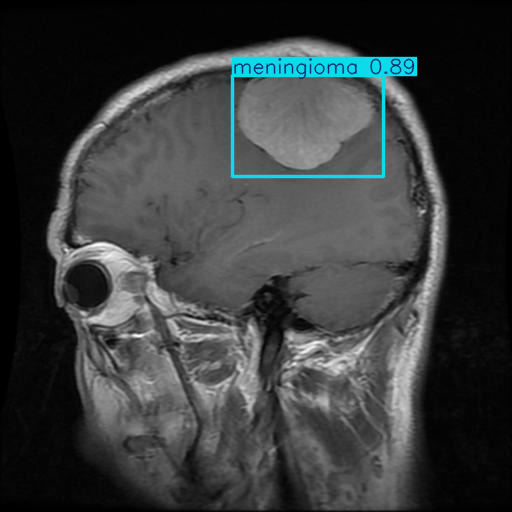